# 6.2 Exploring relationships

# This script contains the following:¶
1. Importing Visualization Libraries and Data
2. Data Cleaning
3. Exploring Relationships
 Correlations
 Scatterplots
 Pair Plots
 Categorical Plots

# 1. Importing Visualization Libraries and Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

Note about matplotlib:¶
There are certain bugs associated with some versions of matplotlib. Before you start your analysis, you should check what version you have by typing matplotlib.__version__ in a Jupyter cell and executing it. If it shows version 3.1.1, you'll likely experience some problems with the way the heatmap appears.

To circumvent this, we recommend opening a new Anaconda terminal and executing this command: conda update --all. This will update all of your packages and install the newest version of matplotlib, where this bug has been fixed.

Then, restart the kernel for your notebook (so it can pick up any changes to your library versions) and rerun your code, which will re-import the libraries in your notebook. Check the version again, and you should have the latest version installed.

In [3]:
matplotlib.__version__

'3.7.1'

In [4]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [5]:
# Define path

path = '/Users/brad/Desktop/ACHIEVEMENT 6'

In [6]:
# Import data

df = pd.read_csv(os.path.join(path, '/Users/brad/Desktop/ACHIEVEMENT 6/Original Data/archive (3)/2019.csv'))


# Cleaning the Data

Renaming Columns

In [7]:
df.shape

(156, 9)

In [8]:
df.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [9]:
# Rename columns whose names are too long

# Rename columns whose names are too long

df.rename(columns = {'Overall rank' : 'Rank', 'Healthy life expectancy': 'Life expectancy', 
                     'Freedom to make life choices': 'freedom of choice'},
                      inplace = True)

In [10]:
df.columns

Index(['Rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Life expectancy', 'freedom of choice', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [11]:
df.dtypes

Rank                           int64
Country or region             object
Score                        float64
GDP per capita               float64
Social support               float64
Life expectancy              float64
freedom of choice            float64
Generosity                   float64
Perceptions of corruption    float64
dtype: object

In [12]:
df.head()

,Rank,Country or region,Score,GDP per capita,Social support,Life expectancy,freedom of choice,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


# Missing value check

In [13]:
# Check for missing values

df.isnull().sum() # No missing values!

Rank                         0
Country or region            0
Score                        0
GDP per capita               0
Social support               0
Life expectancy              0
freedom of choice            0
Generosity                   0
Perceptions of corruption    0
dtype: int64

# Check for duplicates

In [14]:
# Find duplicates

df_dups = df[df.duplicated()]

In [15]:
df_dups.shape # No duplicates!

(0, 9)

# Check for Mixed data types

# 3. Exploring Relationships

## Correlations 

In [16]:
# Create a correlation matrix using pandas

df.corr(numeric_only=True)


,Rank,Score,GDP per capita,Social support,Life expectancy,freedom of choice,Generosity,Perceptions of corruption
Rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Life expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
freedom of choice,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


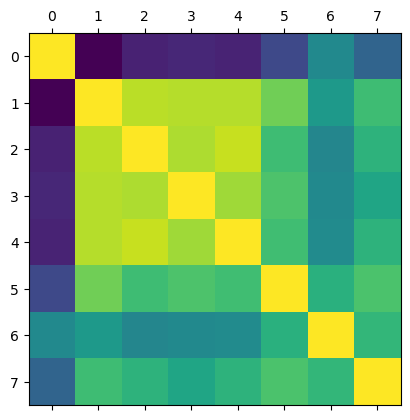

In [17]:
# Create a correlation heatmap using matplotlib

plt.matshow(df.corr(numeric_only=True))
plt.show()

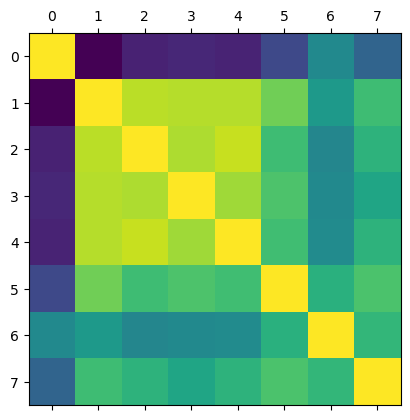

In [18]:
# Save figure
plt.matshow(df.corr(numeric_only=True))
plt.savefig("out.png") 

# This will save the image in the working directory. 
#If you don't know what this directory is the next line will show you how to check

In [19]:
#current dir
cwd = os.getcwd()
cwd

'/Users/brad/Desktop/ACHIEVEMENT 6/Tasks'

Text(0.5, 1.0, 'Correlation Matrix')

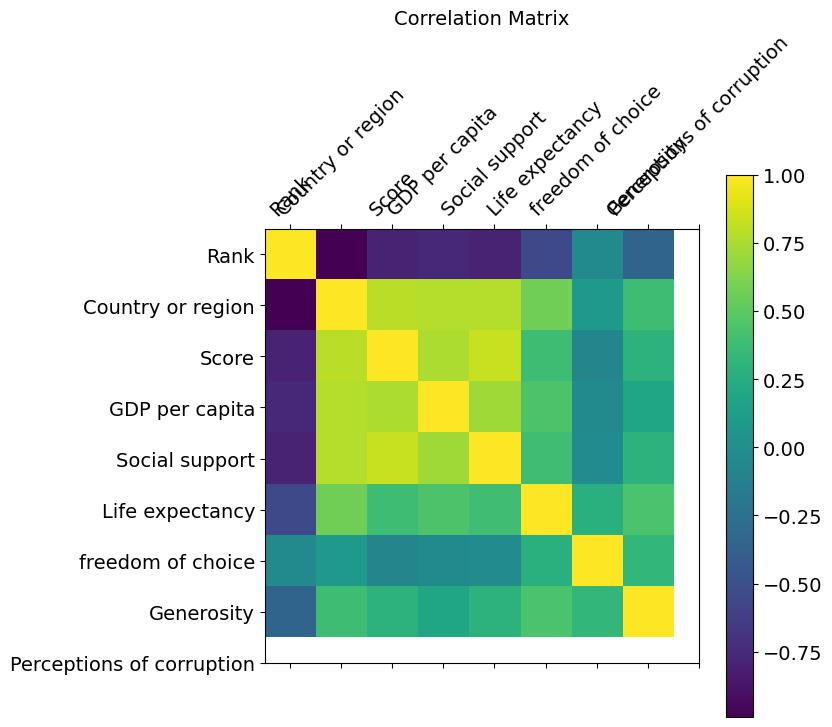

In [20]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(7, 7)) # figure size 
plt.matshow(df.corr(numeric_only=True), fignum=f.number) # type of plot
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df.shape[1]), df.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

# Creating a correlation heatmap using Seaborn

In [21]:
df.columns

Index(['Rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Life expectancy', 'freedom of choice', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [22]:
# Create a subset excluding the "Date" and "No" columns

sub = df[['Rank','GDP per capita', 'Social support', 'Life expectancy', 'freedom of choice','Generosity', 'Perceptions of corruption']]

In [23]:
sub

,Rank,GDP per capita,Social support,Life expectancy,freedom of choice,Generosity,Perceptions of corruption
0,1,1.340,1.587,0.986,0.596,0.153,0.393
1,2,1.383,1.573,0.996,0.592,0.252,0.410
2,3,1.488,1.582,1.028,0.603,0.271,0.341
3,4,1.380,1.624,1.026,0.591,0.354,0.118
4,5,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...
151,152,0.359,0.711,0.614,0.555,0.217,0.411
152,153,0.476,0.885,0.499,0.417,0.276,0.147
153,154,0.350,0.517,0.361,0.000,0.158,0.025
154,155,0.026,0.000,0.105,0.225,0.235,0.035


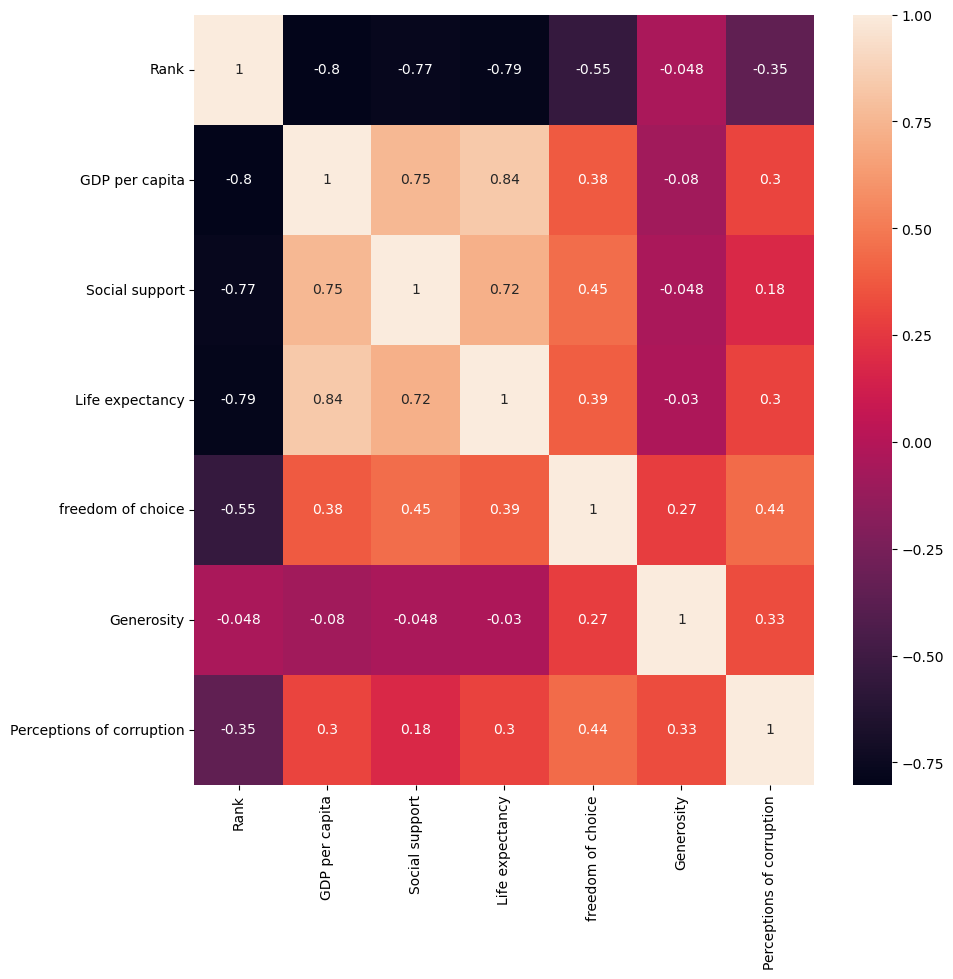

In [24]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(numeric_only=True), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

GDP per capita (-0,8), Social Support (-0,77), and Life expectancy (-0,79) have coefficients that indicate fairly strong negative correlaation. meaning that these variables are strong determinants to overall happiness rank. Freedom of choice (-0,55), Generosity (-0,048) and Perceptions of corruption (-0,35) have a weaker negative correlation. 

# Scatterplot

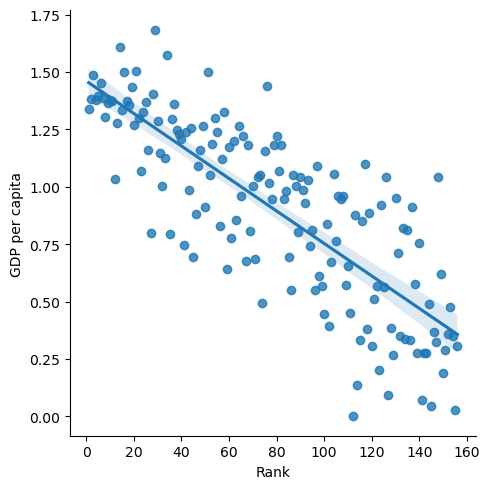

In [25]:
# Create a scatterplot for the "Rank" and "GDP per Capita" columns in seaborn

sns.lmplot(x = 'Rank', y = 'GDP per capita', data = df)

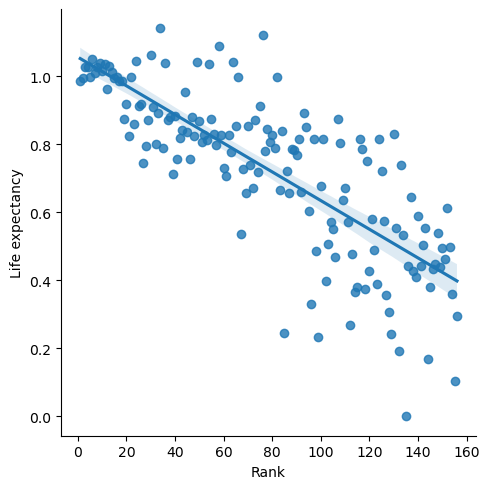

In [26]:
# Create a scatterplot for the "Rank" and "Life Expectancy" columns in seaborn

sns.lmplot(x = 'Rank', y = 'Life expectancy', data = df)

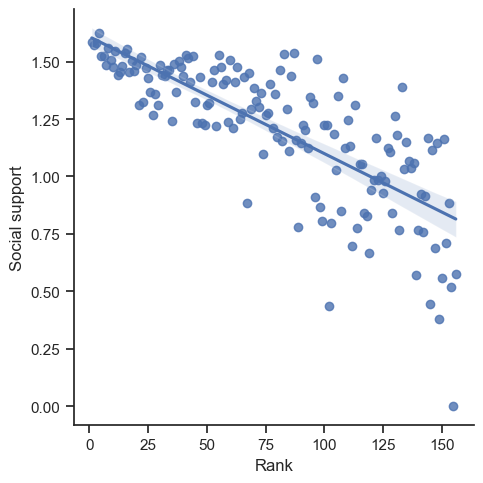

In [36]:
# Create a scatterplot for the "Rank" and "Social Support" columns in seaborn

sns.lmplot(x = 'Rank', y = 'Social support', data = df)

This scatterplot indicates that there is a negative correlation between the level of the GDP per capita and the Rank in happiness. This is indicative of the sharp downward sloping trend line. However, there are a few points that do not correspond to the overall trend. 

# Pair Plots

In [27]:
# Keep only the variables you want to use in the pair plot

sub_2 = sub[['Rank', 'GDP per capita', 'Social support', 'Life expectancy', 'Perceptions of corruption']]

/Users/brad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/brad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/brad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/brad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

/Users/brad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/brad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/brad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/brad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

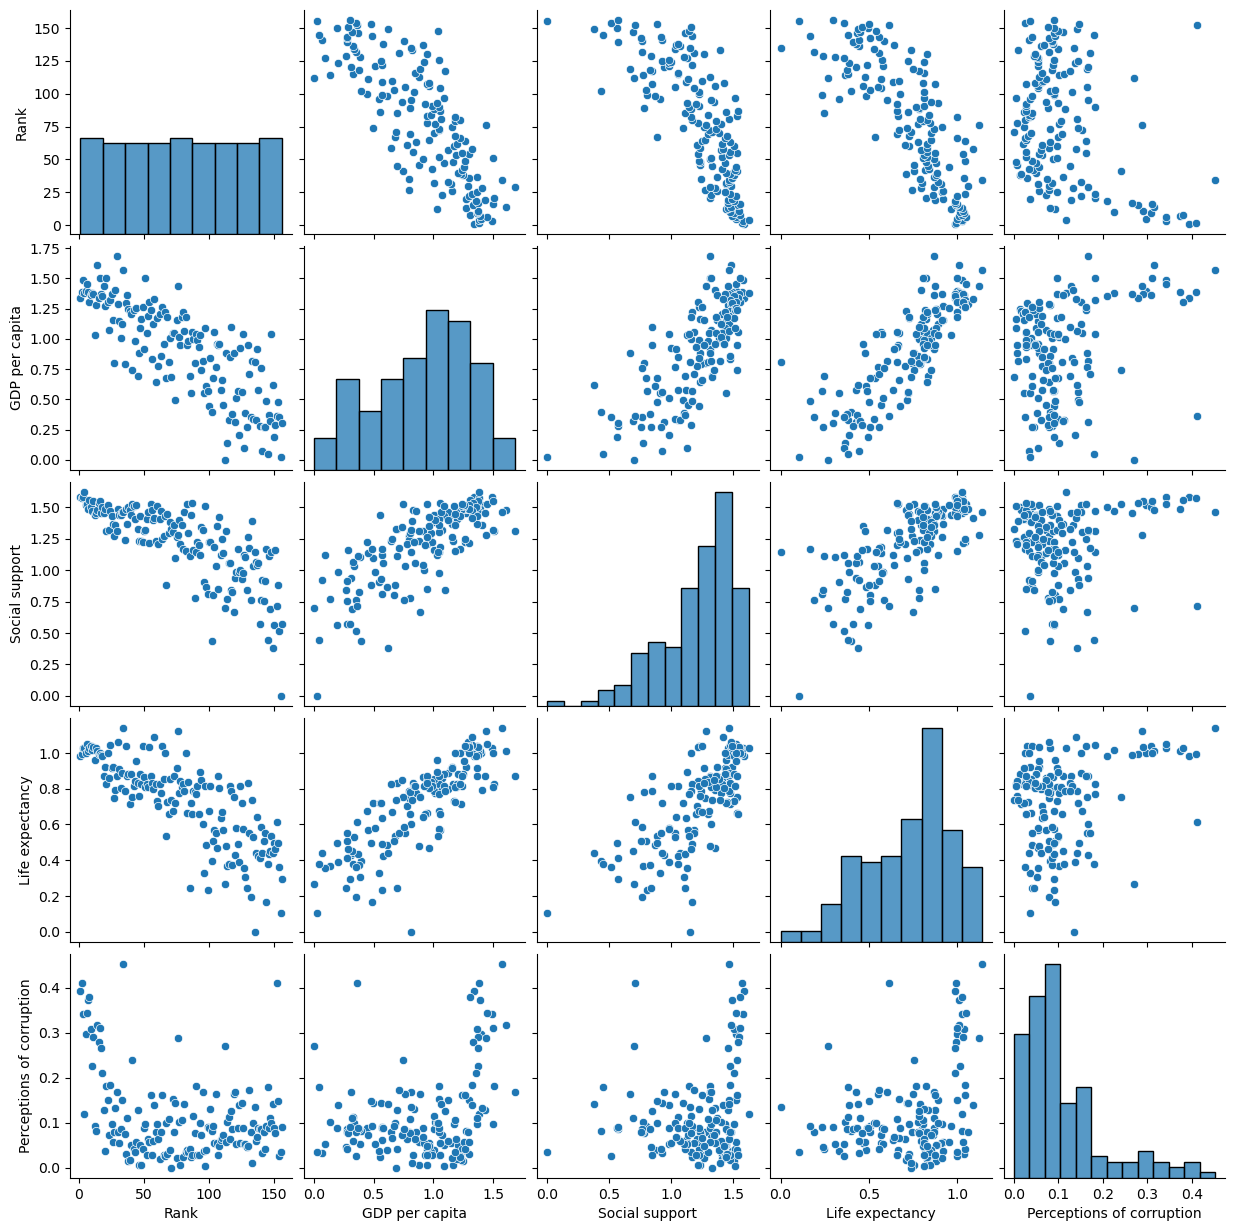

In [28]:
# Create a pair plot 

g = sns.pairplot(sub_2)

The variables of GDP per capita, Social Support and Life expectancy are showing greater correlation to Happiness Index Rank than that of Perceptions of Corruption. The first three variables are thereby strong indictaors of happiness and will thereby be the focus of further analysis.

# Categorical Plot

Creating a categorical variable that splits the "GDP per capita" column into categories

/Users/brad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/brad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='GDP per capita', ylabel='Count'>

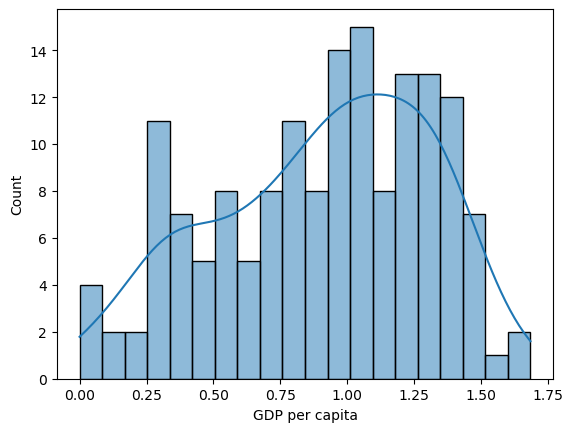

In [29]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df['GDP per capita'], bins = 20, kde = True)

In [30]:
df.loc[df['GDP per capita'] < 0.50, 'GDP category'] = 'Low GDP'

/var/folders/fl/gm58930n2t5f6cf83b_9fgqr0000gp/T/ipykernel_52737/2549400182.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Low GDP' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['GDP per capita'] < 0.50, 'GDP category'] = 'Low GDP'


In [31]:
df.loc[(df['GDP per capita'] >= 0.50) & (df['GDP per capita'] < 1.25), 'GDP category'] = 'Middle GDP'

In [32]:
df.loc[df['GDP per capita'] >= 1.25, 'GDP category'] = 'High GDP'

In [33]:
df['GDP category'].value_counts(dropna = False)

GDP category
Middle GDP    89
High GDP      36
Low GDP       31
Name: count, dtype: int64

In [34]:
df.columns

Index(['Rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Life expectancy', 'freedom of choice', 'Generosity',
       'Perceptions of corruption', 'GDP category'],
      dtype='object')

/Users/brad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/brad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/brad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/brad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

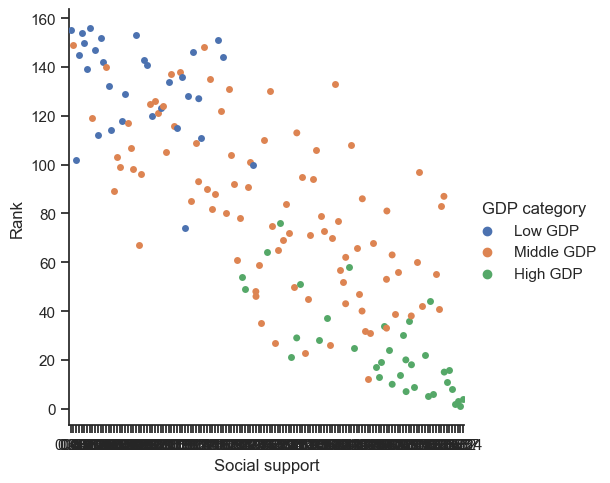

In [35]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="Social support", y="Rank", hue="GDP category", data=df)

This Categorical plot indicates that there tends to be higher levels of social support in countries that exhibit higher GDP. There are however a few points that sit outside this observation. 

# Questions and Answers

The main question that I sought to be answered was whether the variable that contribute to happiness rank are stronger indicators than others. This exploratory analysis has shown that GDP per Capita, Social Support and Life expectancy are stronger indicators than Generosity and Perceptions of corruption respectively. 

# Hypothesis

A countries level of GDP is the biggest determinant of overall happiness. 